## Main Goal
The goal is to develop a dynamic pricing model that optimizes the prices of items to maximize revenue while remaining competitive in the market.  

**This involves:**

1. Analyzing the current pricing strategy and its impact on sales and revenue.
2. Comparing our pricing strategy with that of the competition to identify gaps and opportunities.
3. Developing a dynamic pricing model that adjusts prices based on factors such as competitor pricing, demand elasticity, and market trends.
4. Implementing and simulating the dynamic pricing model to compare its performance against the existing pricing strategy.

### Data Understanding
The given dataset contains pricing information for various items sold at a retail store and their corresponding prices at competing stores. The dataset includes the following columns:

1. **Fiscal_Week_Id**: The fiscal week identifier.
2. **Store_Id**: The store identifier.
3. **Item_Id**: The item identifier.
4. **Price**: The price of the item at our store.
5. **Item_Quantity**: The quantity of the item sold.
6. **Sales_Amount_No_Discount**: Sales amount without discount.
7. **Sales_Amount**: Sales amount after discounts.
8. **Competition_Price**: The price of the item at a competing store.

Key here is to unravel how our pricing strategies have influenced sales and revenue historically, and how competitor prices impact our performance. Considering factors like discounts and temporal aspects (thanks to the Fiscal_Week_Id) will help in identifying patterns and trends essential for optimizing prices. The ultimate goal is to find that sweet spot where price adjustments maximize revenue without sacrificing competitiveness.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("datasets/Competition_Data.csv")

In [3]:
dataset.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


In [6]:
dataset.shape

(100000, 9)

In [7]:
dataset.isnull().sum()

Index                       0
Fiscal_Week_ID              0
Store_ID                    0
Item_ID                     0
Price                       0
Item_Quantity               0
Sales_Amount_No_Discount    0
Sales_Amount                0
Competition_Price           0
dtype: int64

In [8]:
dataset.isna().sum()

Index                       0
Fiscal_Week_ID              0
Store_ID                    0
Item_ID                     0
Price                       0
Item_Quantity               0
Sales_Amount_No_Discount    0
Sales_Amount                0
Competition_Price           0
dtype: int64

### Basic EDA 
#### How does our item pricing correlate with the quantity sold?

In [9]:
# Calculate the overall correlation
correlation = dataset['Price'].corr(dataset['Item_Quantity'])
print(f'Overall Correlation between Price and Quantity Sold: {correlation}')

Overall Correlation between Price and Quantity Sold: -0.17640332559077712


#### What is the relationship between our prices and competitor prices, and how does this difference affect our sales volumes?

In [10]:
# Mean, Median, and Standard Deviation for our prices
our_price_stats = dataset['Price'].describe()

# Mean, Median, and Standard Deviation for competitor prices
competitor_price_stats = dataset['Competition_Price'].describe()

print("Our Price Stats:\n", our_price_stats)
print("\nCompetitor Price Stats:\n", competitor_price_stats)

Our Price Stats:
 count    100000.000000
mean        167.017783
std          69.503418
min          47.700000
25%         105.410000
50%         159.420000
75%         221.900000
max         310.660000
Name: Price, dtype: float64

Competitor Price Stats:
 count    100000.000000
mean        174.280887
std          71.545584
min          47.950000
25%         118.627500
50%         162.510000
75%         237.335000
max         313.640000
Name: Competition_Price, dtype: float64


Our prices have a mean of 167.02, slightly lower than the competitor mean of 174.28. The standard deviation for our prices is 69.50, indicating a slightly narrower range of prices compared to the competitor standard deviation of 71.55!  
The median price (50th percentile) is also lower for our prices at 159.42, compared to the competitor's median of 162.51!  
Lastly, our maximum price is 310.66, slightly below the competitor maximum price of 313.64!  
> This comparison shows that, on average, our prices tend to be slightly lower than those of our competitors, and there is less variability in our pricing as reflected by the standard deviation!

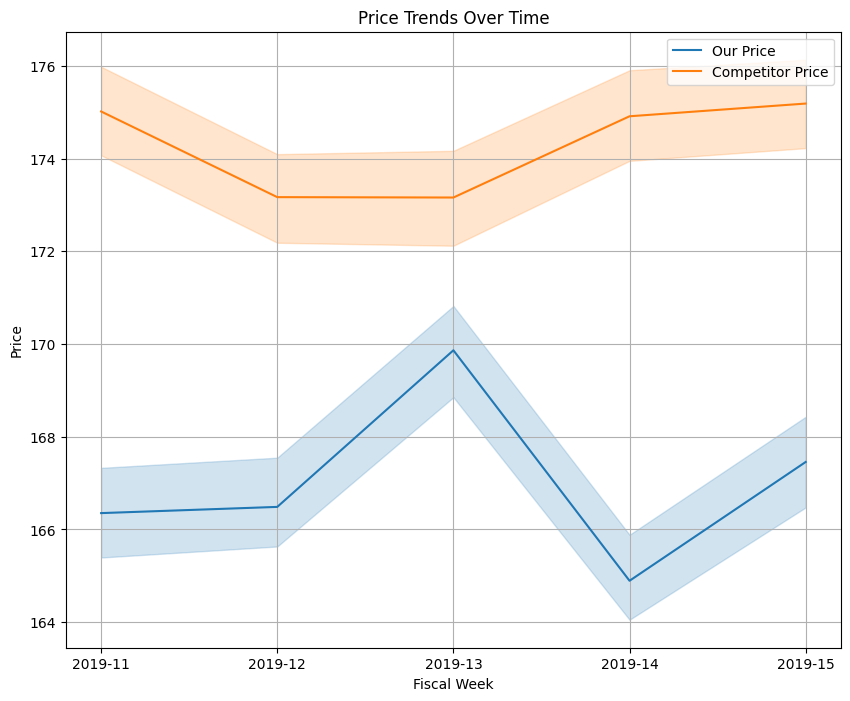

In [11]:
# Plotting the Price and The Competitor Price Trends Over Time
plt.figure(figsize=(10, 8))
sns.lineplot(data=dataset, x='Fiscal_Week_ID', y='Price', label='Our Price')
sns.lineplot(data=dataset, x='Fiscal_Week_ID', y='Competition_Price', label='Competitor Price')
plt.title('Price Trends Over Time')
plt.xlabel('Fiscal Week')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

> The competition maintains higher average prices consistently above 170, with a slight upward trend over the observed weeks. In contrast, our store’s prices start around 166, increase slightly, then dip before rising again. It indicates that the competition follows a more stable pricing strategy, while our store experiences more fluctuations in pricing. The stability in the competition’s pricing could be contributing to their higher and more consistent sales performance.

#### Are there identifiable trends or patterns in sales quantities over different fiscal weeks, indicating seasonality or temporal effects?

In [12]:
# Group by Fiscal_Week_Id and sum Item_Quantity
weekly_sales = dataset.groupby('Fiscal_Week_ID')['Item_Quantity'].sum().reset_index()

# Display the result
print(weekly_sales)

  Fiscal_Week_ID  Item_Quantity
0        2019-11        7839663
1        2019-12        8254376
2        2019-13        7943760
3        2019-14        7836817
4        2019-15        8086516


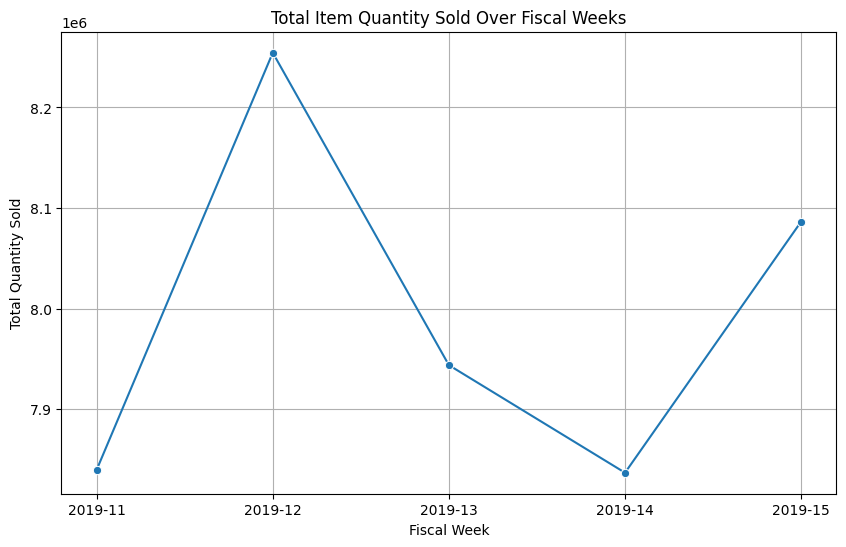

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_sales, x='Fiscal_Week_ID', y='Item_Quantity', marker='o')
plt.title('Total Item Quantity Sold Over Fiscal Weeks')
plt.xlabel('Fiscal Week')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

> It decreases after the first week and continues goes down through the third week and then increases after the fourth week!  

#### How changes in prices affect the change in quantity sold?
Ed = % change in quantity demanded / % change in price  
(Elasticity of demand) = How much the quantity sold changes in percentage terms / How much the price changes in percentage terms

In [ ]:
dataset['price_change'] = dataset['Price'].pct_change()
# This line calculates the fractional change in the Price column for each row compared to the previous row.
dataset['qty_change'] = dataset['Item_Quantity'].pct_change()
# This line calculates the fractional change in the Item_Quantity column for each row compared to the previous row.
# Computes the fractional change from the immediately previous row by default. This is useful in comparing the fraction of change in a time series of elements.

In [16]:
dataset.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44,NaN,NaN
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01,0.0,0.0
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03,0.0,0.0
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66,0.0,0.0
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32,0.0,0.0


In [17]:
# Calculate elasticity using the formula Ed = % change in quantity demanded / % change in price
# This line calculates the price elasticity of demand for each row by dividing the fractional change in quantity sold by the fractional change in price.
dataset['elasticity'] = dataset['qty_change'] / dataset['price_change']

# Replace infinite values with NaN (e.g., when price_change is zero, pct_change can result in inf)
dataset.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Drop rows where elasticity is NaN
dataset.dropna(subset=['elasticity'], inplace=True)

In [18]:
dataset.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity
10,10,2019-11,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147
20,20,2019-11,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520
30,30,2019-11,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086
40,40,2019-11,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389
50,50,2019-11,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661
